# Projects in ML and AI HW #1: Predicting tumor benigness
Suheyl Enis Aras(arass)


A machine learning problem I would like to solve using logistic regression is if a breast tumor is benign or malignant. Logistic regression is the best choice for a problem like this because of its binary nature, a tumor is either benign, meaning its not cancerous or it is malignant, which means it is cancerous. 

In [1]:
#import packages needed 
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import layers
import tensorflow as tf

In [2]:
dataset = pd.read_csv("breast-cancer-wisconsin.data")

#Link to the dataset: https://archive.ics.uci.edu/ml/datasets/breast+cancer

In [3]:
#add column names
dataset.rename(columns = {'1000025':'id', 
                       '5':'clump thickness',
                        '1': 'cell size',
                         '1.1': 'cell shape',
                         '1.2': 'Marginal Adhesion',
                        '2': 'Single Epithelial Cell Size',
                         '1.3': 'Bare Nuclei',
                         '3': 'Bland Chromatin',
                         '1.4': 'Normal Nucleoli',
                         '1.5': 'Mitoses',
                         '2.1': 'result'},inplace =True)
                         
                            

In [4]:
#check for any null values
dataset[pd.isnull(dataset).any(axis=1)]

,id,clump thickness,cell size,cell shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,result


In [5]:
# From the description of the dataset there are some "?" scaterred in the dataset
#need to check for them
dataset.isin(['?']).any()

id                             False
clump thickness                False
cell size                      False
cell shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
result                         False
dtype: bool

In [6]:
# Replace all "?" with the average value in the Bare Nuclei columns mean to make the replaced data as accurate as possible  
dataset['Bare Nuclei'].replace({'?': '4'}, inplace = True)

In [7]:
#change the last object to an integer
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int64')
dataset.info()
#lastly, map the class column as 0 and 1 instead of 2 and 4 so it is binary



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           698 non-null    int64
 1   clump thickness              698 non-null    int64
 2   cell size                    698 non-null    int64
 3   cell shape                   698 non-null    int64
 4   Marginal Adhesion            698 non-null    int64
 5   Single Epithelial Cell Size  698 non-null    int64
 6   Bare Nuclei                  698 non-null    int64
 7   Bland Chromatin              698 non-null    int64
 8   Normal Nucleoli              698 non-null    int64
 9   Mitoses                      698 non-null    int64
 10  result                       698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [8]:
sns.set()

In [2]:
corr_dataset = movies_dataset.corr()
round(corr_dataset,2)
sns.heatmap(corr_dataset, annot = True)

NameError: name 'movies_dataset' is not defined

In [10]:
#id and result are clearly unrelated, lets drop that column
dataset = dataset.iloc[: , 1:]

In [11]:
#Dataset is ready, time to implement logistic regression

In [12]:
y = dataset.result.copy()
X = dataset.drop(['result'], axis=1)

In [13]:
#use this to split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.89, random_state=123)

In [14]:
class LogisticRegressionVanilla:
    def sigmoid(self,z):
        return 1 / (1 + e**(-z))
    def cost(self, X, y, weights):
        z = dot(X, weights) 
        predict_true = y * log(self.sigmoid(z))
        predict_false = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_true + predict_false) / len(X)
    
    def fit(self, X, y, epochs, lr):
        loss_array = []
        weights = rand(X.shape[1])
        for _ in range(epochs):
            #vanilla gradient descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / len(X)           
            # Saving Progress
            loss_array.append(self.cost(X, y, weights)) 
        self.weights = weights
        self.loss_array = loss_array
    def predict(self, X):
        z = dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]             

In [15]:
model = LogisticRegressionVanilla()
model.fit(X_train, y_train, epochs = 500, lr = 0.5)

<ipython-input-14-df743b2a74b1>:7: RuntimeWarning: divide by zero encountered in log
  predict_false = (1 - y) * log(1 - self.sigmoid(z))


In [16]:
pred = model.predict(X_test)
#remove the nan values to get the average of losses
loss = model.loss_array
for i in loss:
    if np.isnan(i):
        loss.remove(i)
loss_avg = sum(loss)/len(loss)

              precision    recall  f1-score   support

           0       0.96      0.37      0.54       415
           1       0.44      0.97      0.60       207

    accuracy                           0.57       622
   macro avg       0.70      0.67      0.57       622
weighted avg       0.79      0.57      0.56       622

Average loss: nan
-------------------------------------------------------


Text(0.5, 0, 'Epoch')

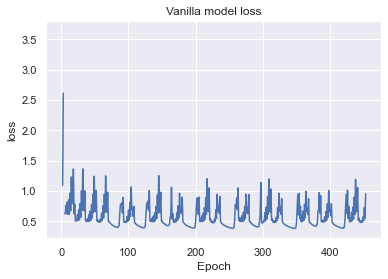

In [17]:
print(classification_report(y_test, pred))
print(f"Average loss: {loss_avg}")
print('-'*55)




plt.plot(loss)
plt.title('Vanilla model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

As we can see the vanilla gradient descent predicted 622 out 698 of the results correctly and it had a better time predicting benign tumors than malignant tumors in the dataset. Overall it did pretty good predicting from the dataset, even though using a package like scikit would be faster and more accurate. When it comes to the loss function it did not perform well, the average loss was at 0.597 when all the non existent values were removed from the array, which is not a very good performance, this is most likely because the gradient descent is not optimized, it is likely that a small adjustment like adding momentum to the algorithm will make a major difference to the loss value we get.

In [585]:
#First optimization algorithm, momentum 
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="momentum"
)


In [586]:
#Setup the model with the correct input shape and sigmoid activation 
model = tf.keras.models.Sequential([
      keras.layers.Dense(1, input_shape=(9,), activation='sigmoid')
])


In [587]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
                 metrics = ['binary_accuracy'])

In [588]:
history = model.fit(X_train, y_train, epochs=500)
model.evaluate(X_test, y_test,verbose=2)


Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 1.4986 - binary_accuracy: 0.6316
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 1.0160 - binary_accuracy: 0.5789
Epoch 3/500
3/3 [==============================] - 0s 1ms/step - loss: 0.9653 - binary_accuracy: 0.5658
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 0.9094 - binary_accuracy: 0.5921
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7558 - binary_accuracy: 0.6053
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.7105
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.8026
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.5712 - binary_accuracy: 0.7763
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6073 - binary_accuracy: 0.7105
Epoch 10/500
3/3 [==============================] - 0s 3ms/step 

3/3 [==============================] - 0s 2ms/step - loss: 0.2180 - binary_accuracy: 0.9605
Epoch 80/500
3/3 [==============================] - 0s 3ms/step - loss: 0.2171 - binary_accuracy: 0.9605
Epoch 81/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2120 - binary_accuracy: 0.9605
Epoch 82/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2106 - binary_accuracy: 0.9737
Epoch 83/500
3/3 [==============================] - 0s 3ms/step - loss: 0.2099 - binary_accuracy: 0.9605
Epoch 84/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2099 - binary_accuracy: 0.9737
Epoch 85/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2074 - binary_accuracy: 0.9737
Epoch 86/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2056 - binary_accuracy: 0.9737
Epoch 87/500
3/3 [==============================] - 0s 2ms/step - loss: 0.2038 - binary_accuracy: 0.9737
Epoch 88/500
3/3 [==============================] - 0s 2ms/step - lo

3/3 [==============================] - 0s 2ms/step - loss: 0.1300 - binary_accuracy: 0.9737
Epoch 234/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1269 - binary_accuracy: 0.9605
Epoch 235/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1203 - binary_accuracy: 0.9737
Epoch 236/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1233 - binary_accuracy: 0.9737
Epoch 237/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1200 - binary_accuracy: 0.9868
Epoch 238/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1215 - binary_accuracy: 0.9737
Epoch 239/500
3/3 [==============================] - 0s 3ms/step - loss: 0.1195 - binary_accuracy: 0.9737
Epoch 240/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1170 - binary_accuracy: 0.9868
Epoch 241/500
3/3 [==============================] - 0s 3ms/step - loss: 0.1192 - binary_accuracy: 0.9868
Epoch 242/500
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 3ms/step - loss: 0.0863 - binary_accuracy: 0.9868
Epoch 388/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0846 - binary_accuracy: 0.9868
Epoch 389/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0854 - binary_accuracy: 0.9868
Epoch 390/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0857 - binary_accuracy: 0.9868
Epoch 391/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0836 - binary_accuracy: 0.9868
Epoch 392/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0840 - binary_accuracy: 0.9868
Epoch 393/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0874 - binary_accuracy: 0.9737
Epoch 394/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0879 - binary_accuracy: 0.9737
Epoch 395/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0855 - binary_accuracy: 0.9868
Epoch 396/500
3/3 [==============================] - 0s 2ms/

[0.2009112387895584, 0.9308681488037109]

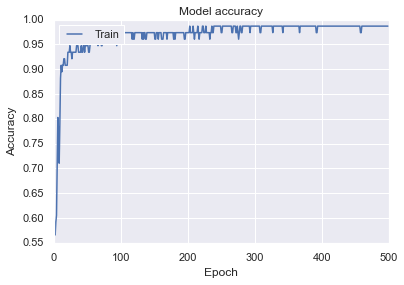

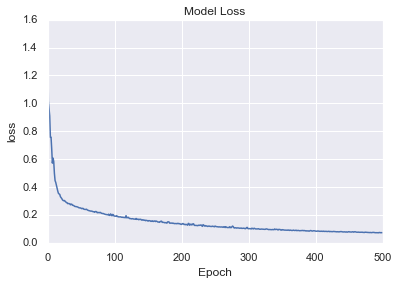

In [589]:
plt.plot(history.history['binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [590]:
#Second optimization algorithm, RMSProp using Keras tensorflow
RMS = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
)

In [591]:
model.compile(optimizer=RMS,
              loss='binary_crossentropy',
                 metrics = ['binary_accuracy'])

In [592]:
history = model.fit(X_train, y_train, epochs=500)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0728 - binary_accuracy: 0.9868
Epoch 2/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0715 - binary_accuracy: 0.9868
Epoch 3/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0722 - binary_accuracy: 0.9868
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0715 - binary_accuracy: 0.9868
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0717 - binary_accuracy: 0.9868
Epoch 6/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0713 - binary_accuracy: 0.9868
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0715 - binary_accuracy: 0.9868
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0713 - binary_accuracy: 0.9868
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0711 - binary_accuracy: 0.9868
Epoch 10/500
3/3 [==============================] - 0s 2ms/step 

3/3 [==============================] - 0s 1ms/step - loss: 0.0665 - binary_accuracy: 0.9868
Epoch 157/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0666 - binary_accuracy: 0.9868
Epoch 158/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0667 - binary_accuracy: 0.9868
Epoch 159/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0665 - binary_accuracy: 0.9868
Epoch 160/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0664 - binary_accuracy: 0.9868
Epoch 161/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0668 - binary_accuracy: 0.9868
Epoch 162/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0664 - binary_accuracy: 0.9868
Epoch 163/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0664 - binary_accuracy: 0.9868
Epoch 164/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0663 - binary_accuracy: 0.9868
Epoch 165/500
3/3 [==============================] - 0s 2ms/

3/3 [==============================] - 0s 2ms/step - loss: 0.0623 - binary_accuracy: 0.9868
Epoch 311/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0624 - binary_accuracy: 0.9868
Epoch 312/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0625 - binary_accuracy: 0.9868
Epoch 313/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0623 - binary_accuracy: 0.9868
Epoch 314/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0623 - binary_accuracy: 0.9868
Epoch 315/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0622 - binary_accuracy: 0.9868
Epoch 316/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0621 - binary_accuracy: 0.9868
Epoch 317/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0621 - binary_accuracy: 0.9868
Epoch 318/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0620 - binary_accuracy: 0.9868
Epoch 319/500
3/3 [==============================] - 0s 1ms/

3/3 [==============================] - 0s 1ms/step - loss: 0.0589 - binary_accuracy: 0.9868
Epoch 465/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0587 - binary_accuracy: 0.9868
Epoch 466/500
3/3 [==============================] - 0s 1ms/step - loss: 0.0585 - binary_accuracy: 0.9868
Epoch 467/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0587 - binary_accuracy: 0.9868
Epoch 468/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0586 - binary_accuracy: 0.9868
Epoch 469/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0585 - binary_accuracy: 0.9868
Epoch 470/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0586 - binary_accuracy: 0.9868
Epoch 471/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0587 - binary_accuracy: 0.9868
Epoch 472/500
3/3 [==============================] - 0s 2ms/step - loss: 0.0590 - binary_accuracy: 0.9868
Epoch 473/500
3/3 [==============================] - 0s 2ms/

[0.19452370703220367, 0.9356912970542908]

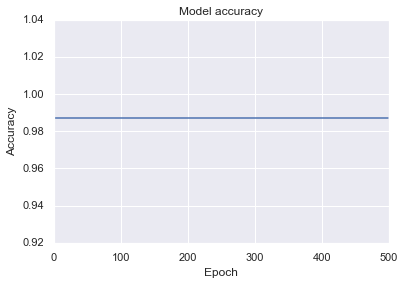

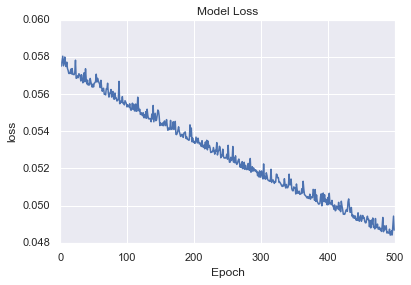

In [468]:
plt.plot(history.history['binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

The momentum optimization algorithm scored a pretty high 0.932 accuracy result while the RMSprop algorithm scored slightly better at 0.937. The RMSProp scored slightly better in the same binary crossentropy loss function as the momentum algorithm. Overall, these two algorithms performed very similary on the dataset. 

When compared to the vanilla gradient descent I had implemented, it did a lot better predicting and with the loss function as well. There might be two reasons i can think of for this, one of them is because the keras package is more accurate and faster than any hand implemented gradient descent algorithm. The second reason is because the optimized algorithms are well, optimized to decrease the loss and therefore improve the prediction rate. 